In [1]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import pandas as pd
import numpy as np

# import torch
from torch.utils.data import Dataset
# from torchvision import datasets
import torchvision
import tensorflow as tf
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torchvision.io import read_image
from torchtext.data import get_tokenizer
from torchtext.vocab import GloVe
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import gc
# from torch.autograd import Variable

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!CUBLAS_WORKSPACE_CONFIG=:4096:2
torch.backends.cudnn.deterministic = True

In [4]:
img_dir = '/content/drive/MyDrive/ml_a4/col774-2022/images/images/'#'../input/col774-2022/images/images/'
train_path_x ='/content/drive/MyDrive/ml_a4/col774-2022/train_x.csv'#'../input/col774-2022/train_x.csv'
train_path_y ='/content/drive/MyDrive/ml_a4/col774-2022/train_y.csv'#'../input/col774-2022/train_y.csv'
test_path_x = '/content/drive/MyDrive/ml_a4/col774-2022/non_comp_test_x.csv'#'../input/col774-2022/non_comp_test_x.csv'
test_path_y = '/content/drive/MyDrive/ml_a4/col774-2022/non_comp_test_y.csv'#'../input/col774-2022/non_comp_test_y.csv'

In [ ]:
#CNN

In [ ]:
class CustomImageDataset(Dataset):
    def __init__(self, train_path_x, train_path_y, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(train_path_y)
        self.img_names  = pd.read_csv(train_path_x)
        self.img_names  = self.img_names.set_index('Id')
        self.img_labels = self.img_labels.set_index('Id')
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):        
        img_path = os.path.join(self.img_dir, self.img_names['Cover_image_name'][idx])
        image = read_image(img_path)
        image = image/255.0
        label = self.img_labels['Genre'][idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [ ]:
training_data = CustomImageDataset(train_path_x, train_path_y, img_dir)
test_data = CustomImageDataset(test_path_x, test_path_y, img_dir)
train_dataloader = DataLoader(training_data, batch_size=100, shuffle=True)
test_dataloader  = DataLoader(test_data, batch_size=100, shuffle=True)

NameError: ignored

<class 'torch.Tensor'>
<class 'torch.Tensor'>
Feature batch shape: torch.Size([100, 3, 224, 224])
Labels batch shape: torch.Size([100])
tensor([[[0.1020, 0.1020, 0.1020,  ..., 0.1176, 0.1059, 0.1059],
         [0.1020, 0.1020, 0.1020,  ..., 0.1137, 0.1059, 0.1059],
         [0.1059, 0.1059, 0.1059,  ..., 0.1137, 0.1137, 0.1137],
         ...,
         [0.1098, 0.1137, 0.1216,  ..., 0.0980, 0.1020, 0.1059],
         [0.1098, 0.1451, 0.1529,  ..., 0.0941, 0.1020, 0.0980],
         [0.1333, 0.1137, 0.1137,  ..., 0.0980, 0.0863, 0.0902]],

        [[0.1059, 0.1059, 0.1059,  ..., 0.1020, 0.1020, 0.1020],
         [0.1059, 0.1059, 0.1059,  ..., 0.0980, 0.1020, 0.1020],
         [0.1020, 0.1020, 0.1020,  ..., 0.0980, 0.0980, 0.0980],
         ...,
         [0.0784, 0.0824, 0.0902,  ..., 0.1020, 0.1098, 0.1137],
         [0.0784, 0.1137, 0.1216,  ..., 0.1020, 0.1098, 0.1176],
         [0.1020, 0.0824, 0.0824,  ..., 0.1059, 0.1059, 0.1098]],

        [[0.0824, 0.0824, 0.0824,  ..., 0.0980, 0.09

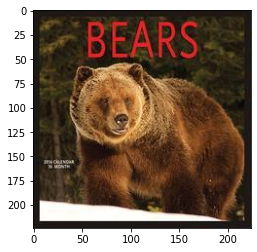

Label: 15


In [ ]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(type(train_features))
print(type(train_labels))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
print(train_features[0].squeeze())
print(train_labels[9])
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img.permute(1, 2, 0))
plt.show()
print(f"Label: {label}")

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()                
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=(5,5)),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2), stride=2),
            nn.Conv2d(32, 64, kernel_size=(5,5)),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2), stride=2),
            nn.Conv2d(64, 128, kernel_size=(5,5)),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2), stride=2),
            nn.Flatten(),
            nn.Linear(128*24*24, 128),
            nn.ReLU(),
            nn.Linear(128, 30)            
        )
        
    def forward(self, x):
        return self.network(x)        

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = NeuralNetwork().to(device)
print(model)
print(device)

In [ ]:
learning_rate = 1e-2
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
def accuracy(dataloader, model):    
    cnt = 0
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            cnt += (pred.argmax(1) == y).type(torch.float).sum().item()
    return cnt/len(dataloader.dataset)

In [ ]:
def train(dataloader, model, loss_fn, optimizer, batch_size=100, epochs=10, set_epsilon=False, epsilon=1e-5):
    loss_vals, epoch_vals, accuracy_vals = [], [], []
    for epoch in range(epochs):
        for batch, (X, y) in enumerate(dataloader):            
            pred = model(X)
            loss = loss_fn(pred, y)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
        loss_vals.append(loss.item())
        epoch_vals.append(epoch)
        accuracy_vals.append(accuracy(test_dataloader, model))
        print('epoch = {}'.format(epoch))
        print('accuracy = {}'.format(accuracy_vals[-1]))
    return loss_vals, epoch_vals, accuracy_vals

In [ ]:
# loss_vals, epoch_vals, accuracy_vals = train(train_dataloader, model, loss_fn, optimizer, epochs=100)
plt.xlabel('epochs')
plt.ylabel('accuracy')    
plt.plot(epoch_vals, accuracy_vals)
plt.savefig('epoch_vs_accuracy')    
plt.ylabel('loss')    
plt.plot(epoch_vals, loss_vals)
plt.savefig('epoch_vs_loss_vals')

### RNN

In [5]:
embeddings_file_path = '/content/drive/MyDrive/ml_a4/glove.6B.300d.txt'#'../input/glove-embeddings/glove.6B.300d.txt'

In [6]:
# load embeddings and vocab
idx = 0
vocab, embeddings, word_idx = [], [], {}
with open(embeddings_file_path, 'r') as file:
    for line in file:
        line = line.rstrip().split(' ')
        word_idx[line[0]] = idx
        idx += 1
        vocab.append(line[0])
        embeddings.append([float(i) for i in line[1:]])
vocab.append('<pad>')
vocab.append('<unk>')
embeddings.append([0 for _ in range(len(embeddings[0]))])
embeddings.append(np.mean(np.array(embeddings), axis=0))
word_idx['<pad>'] = idx
idx += 1
word_idx['<unk>'] = idx

In [7]:
vocab_np = np.array(vocab)
embeddings_np = np.array(embeddings)

In [ ]:
# find max_length
tokenizer = get_tokenizer("basic_english")
stopwords_list = stopwords.words('english')
max_length = 50

In [ ]:
def tokenize(sentence,pad=True,pad_len=max_length,remove_stopwords=True):
    words = tokenizer(sentence)
    words = [word.lower() for word in words if word.isalpha()]
    if remove_stopwords:
        words = [word for word in words if word not in stopwords_list]
    while len(words) > max_length:
        words.pop()
    while pad and len(words) < max_length:
        words.append('<pad>')
    return words

In [ ]:
def get_index(words): 
    indices = []    
    for word in words:
        if word in vocab:            
            indices.append(word_idx[word])
        else:
            target = '<pad>' if word == '<pad>' else '<unk>'
            indices.append(word_idx[target])
    return indices

In [ ]:
# class LoadTextData(Dataset):
#     def __init__(self, train_path_x, train_path_y):
#         self.img_labels = pd.read_csv(train_path_y)
#         self.title_info = pd.read_csv(train_path_x)
#         self.img_labels = self.img_labels.set_index('Id')
#         self.title_info = self.title_info.set_index('Id')
#         return
#     def __len__(self):
#         return len(self.img_labels)
#     def __getitem__(self, idx):
#         label = self.img_labels['Genre'][idx]
#         title = self.title_info['Title'][idx]
#         title = tokenize(title)
#         title_embed = get_index(title)
#         return title_embed, label

In [ ]:
img_labels = pd.read_csv(train_path_y).set_index('Id')
title_info = pd.read_csv(train_path_x).set_index('Id')
features, targets = [], []
for i in range(len(img_labels['Genre'])):
    title = title_info['Title'][i]
    features.append(get_index(tokenize(title)))
    targets.append(img_labels['Genre'][i])
# features_t  = torch.from_numpy(np.array(features)).type(torch.LongTensor)
# targets_t  = torch.from_numpy(np.array(targets)).type(torch.LongTensor)
# dataset = torch.utils.data.TensorDataset(features_t, targets_t)

In [8]:
features_output_path = '/content/drive/MyDrive/ml_a4/features_numpy_1.npy'#'../input/glove-embeddings/glove.6B.300d.txt'
targets_output_path = '/content/drive/MyDrive/ml_a4/targets_numpy_1.npy'#'../input/glove-embeddings/glove.6B.300d.txt'

In [ ]:
with open(features_output_path, 'wb') as f:
    np.save(f, np.array(features, dtype=object))
with open(targets_output_path, 'wb') as f:
    np.save(f, np.array(targets, dtype=object))

In [9]:
features_np = np.load(features_output_path, allow_pickle=True)
targets_np  = np.load(targets_output_path, allow_pickle=True)

In [10]:
features_np_array = []
for features in features_np:
    features_np_array.append([int(feature) for feature in features])
targets_np_array = []
for targets in targets_np:
    targets_np_array.append(int(targets))
features_np = features_np_array
targets_np  = targets_np_array

In [ ]:
print(type(features_np_array[0]))
print(type(targets_np))

<class 'list'>
<class 'list'>


In [ ]:
print(len(features_np[0]))
print(type(features_np[0]))

50
<class 'list'>


In [11]:
def get_one_hot(x,r=30):
    one_hot_x = []
    for xi in x:
        # print(xi)
        one_hot = [0.0 for i in range(r)]
        one_hot[int(xi)-1] = 1.0
        one_hot_x.append(one_hot)    
    return np.array(one_hot_x)

In [ ]:
tmp = get_one_hot(targets_np)

In [ ]:
len(tmp[0])

30

In [12]:
features_t = torch.tensor(features_np)
targets_t  = torch.tensor(get_one_hot(targets_np))
dataset = torch.utils.data.TensorDataset(features_t, targets_t)

In [13]:
# training_data = LoadTextData(train_path_x, train_path_y)
# test_data = LoadTextData(test_path_x, test_path_y)
train_dataloader = DataLoader(dataset, batch_size=1000, shuffle=True)
# test_dataloader  = DataLoader(test_data, batch_size=100, shuffle=True)

In [ ]:
len(train_dataloader.dataset)

34200

In [ ]:
img_labels_test = pd.read_csv(test_path_y).set_index('Id')
title_info_test = pd.read_csv(test_path_x).set_index('Id')
features_test, targets_test = [], []
for i in range(len(img_labels_test['Genre'])):
    title = title_info_test['Title'][i]
    features_test.append(get_index(tokenize(title)))
    targets_test.append(img_labels_test['Genre'][i])
# features_t  = torch.from_numpy(np.array(features)).type(torch.LongTensor)
# targets_t  = torch.from_numpy(np.array(targets)).type(torch.LongTensor)
# dataset = torch.utils.data.TensorDataset(features_t, targets_t)

In [14]:
features_output_path_test = '/content/drive/MyDrive/ml_a4/features_numpy_1_test.npy'#'../input/glove-embeddings/glove.6B.300d.txt'
targets_output_path_test = '/content/drive/MyDrive/ml_a4/targets_numpy_1_test.npy'#'../input/glove-embeddings/glove.6B.300d.txt'

In [ ]:
with open(features_output_path_test, 'wb') as f:
    np.save(f, np.array(features_test, dtype=object))
with open(targets_output_path_test, 'wb') as f:
    np.save(f, np.array(targets_test, dtype=object))

In [15]:
features_np_test = np.load(features_output_path_test, allow_pickle=True)
targets_np_test  = np.load(targets_output_path_test, allow_pickle=True)

In [16]:
features_np_array_test = []
for features in features_np_test:
    features_np_array_test.append([int(feature) for feature in features])
targets_np_array_test = []
for targets in targets_np_test:
    targets_np_array_test.append(int(targets))
features_np_test = features_np_array_test
targets_np_test  = targets_np_array_test

In [ ]:
print(len(features_np_test[4]))

50


In [17]:
features_t_test = torch.tensor(features_np_test)
targets_t_test  = torch.tensor(get_one_hot(targets_np_test))
test_dataset = torch.utils.data.TensorDataset(features_t_test, targets_t_test)
test_dataloader = DataLoader(test_dataset, batch_size=1000, shuffle=True)

In [ ]:
train_features, train_labels = next(iter(test_dataloader))
print(type(train_features))
print(type(train_labels))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
print(train_features[0].squeeze())
print(train_labels[9])

<class 'torch.Tensor'>
<class 'torch.Tensor'>
Feature batch shape: torch.Size([1000, 50])
Labels batch shape: torch.Size([1000, 30])
tensor([  2278,   9370,    967,   5015, 400000, 400000, 400000, 400000, 400000,
        400000, 400000, 400000, 400000, 400000, 400000, 400000, 400000, 400000,
        400000, 400000, 400000, 400000, 400000, 400000, 400000, 400000, 400000,
        400000, 400000, 400000, 400000, 400000, 400000, 400000, 400000, 400000,
        400000, 400000, 400000, 400000, 400000, 400000, 400000, 400000, 400000,
        400000, 400000, 400000, 400000, 400000])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=torch.float64)


In [ ]:
# img_labels_test = pd.read_csv(test_path_y).set_index('Id')
title_info_test = pd.read_csv(test_path_x).set_index('Id')
# features_test, targets_test = [], []
# for i in range(len(img_labels_test['Genre'])):
title = title_info_test['Title'][0]
print(tokenize(title))
print(get_index(tokenize(title)))
# targets_test.append(img_labels_test['Genre'][i])
# features_t  = torch.from_numpy(np.array(features)).type(torch.LongTensor)
# targets_t  = torch.from_numpy(np.array(targets)).type(torch.LongTensor)
# dataset = torch.utils.data.TensorDataset(features_t, targets_t)

['venus', 'serena', 'williams', 'great', 'african', 'american', 'women', 'kids', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']
[7416, 8680, 1317, 353, 685, 140, 266, 1813, 400000, 400000, 400000, 400000, 400000, 400000, 400000, 400000, 400000, 400000, 400000, 400000, 400000, 400000, 400000, 400000, 400000, 400000, 400000, 400000, 400000, 400000, 400000, 400000, 400000, 400000, 400000, 400000, 400000, 400000, 400000, 400000, 400000, 400000, 400000, 400000, 400000, 400000, 400000, 400000, 400000, 400000]


In [ ]:
print(title)

Venus and , Serena Williams (Great African American Women for Kids)


In [18]:
class RecurrentNeuralNetwork(nn.Module):
    def __init__(self, embeddings_np):
        super(RecurrentNeuralNetwork, self).__init__()
        # super().__init__()
        self.embedding = nn.Embedding.from_pretrained(torch.from_numpy(embeddings_np).float(), padding_idx=400000)
        self.rnn_layer = nn.RNN(input_size=300,hidden_size=128,bidirectional=True,batch_first=True)#,nonlinearity='relu')                
        self.fc1 = nn.Linear(2*128,128)
        self.fc2 = nn.Linear(128,30)  
        self.softmax = nn.Softmax(dim=1)
        self.activation = nn.Tanh()
        self.sigmoid = nn.Sigmoid()
    
    def forward(self,x):
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        x = self.embedding(x)        
        out, _ = self.rnn_layer(x)
        # h0 = Variable(torch.zeros(2, x.size(0), 128))
        # out, hn = self.rnn_layer(x, h0)

        out = self.fc1(out[:,0,:])
        out = self.activation(out)
        out = self.fc2(out)  
        out = self.activation(out)      
        # out = self.activation(out)
        # out = self.softmax(out)
        return out

In [19]:
def accuracy1(dataloader, model):    
    correct = 0
    softmax = nn.Softmax(dim=1)
    device = "cuda" if torch.cuda.is_available() else "cpu"
    with torch.no_grad():
        for X, y in dataloader:        
            pred = model(X.to(device))
            pred = softmax(pred)
            correct += (pred.argmax(1) == y.to(device).argmax(1)).type(torch.int).sum().item()            
    return correct/len(dataloader.dataset)

In [20]:
device =  torch.device("cuda" if torch.cuda.is_available() else "cpu")
# strategy = tf.distribute.MirroredStrategy()
# with strategy.scope():
model = RecurrentNeuralNetwork(embeddings_np).to(device)
# model = model
# load model
load_path = '/content/drive/MyDrive/ml_a4/non_comp_rnn.pt'
model.load_state_dict(torch.load(load_path))
model.to(device)
print(model)
print(device)
print(type(model))

RecurrentNeuralNetwork(
  (embedding): Embedding(400002, 300, padding_idx=400000)
  (rnn_layer): RNN(300, 128, batch_first=True, bidirectional=True)
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=30, bias=True)
  (softmax): Softmax(dim=1)
  (activation): Tanh()
  (sigmoid): Sigmoid()
)
cuda
<class '__main__.RecurrentNeuralNetwork'>


In [24]:
learning_rate = 1e-3
weight_decay = 5e-4
loss_fn = nn.MSELoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [25]:
def train(dataloader, model, loss_fn, optimizer, epochs=10, set_epsilon=False, epsilon=1e-5, verbose=True):
    loss_vals, epoch_vals, accuracy_vals = [], [], []
    train_accuracy_vals = []
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")    
    for epoch in range(epochs):
        model.train()
        cnt = 0
        for batch, (X_, y_) in enumerate(dataloader): 
#             print(X.shape)
            # print(cnt, end=' ')
            cnt += 1            
            X = X_.to(device).long()            
            y = y_.to(device).float()            
            # Clear gradients            
            pred = model(X)
#             print(pred.shape)
            loss = loss_fn(pred, y)
            
            optimizer.zero_grad()
            loss.backward()            
            optimizer.step()
            # del X
            # del y
            # gc.collect()
            # torch.cuda.empty_cache()
            
        loss_vals.append(loss.item())
        epoch_vals.append(epoch)
        accuracy_vals.append(accuracy1(test_dataloader, model))        
        train_accuracy_vals.append(accuracy1(train_dataloader, model))
        if verbose and epoch%100 == 0:
            print("")
            print('epoch = {}'.format(epoch))
            print('loss = {}'.format(loss.item()))
            print('train accuracy = {}'.format(train_accuracy_vals[-1]))
            print('test accuracy = {}'.format(accuracy_vals[-1]))        
    return loss_vals, epoch_vals, accuracy_vals, train_accuracy_vals

In [26]:
loss_vals, epoch_vals, accuracy_vals, train_accuracy_vals = train(train_dataloader, model, loss_fn, optimizer, epochs=500)


epoch = 0
loss = 0.027186667546629906
train accuracy = 0.4338888888888889
test accuracy = 0.4024561403508772

epoch = 100
loss = 0.01506506372243166
train accuracy = 0.7363742690058479
test accuracy = 0.5147368421052632

epoch = 200
loss = 0.009907368570566177
train accuracy = 0.8594736842105263
test accuracy = 0.4842105263157895

epoch = 300
loss = 0.010982346720993519
train accuracy = 0.8152046783625732
test accuracy = 0.47649122807017547

epoch = 400
loss = 0.0078063951805233955
train accuracy = 0.8742690058479532
test accuracy = 0.47017543859649125


In [ ]:
#11min training time

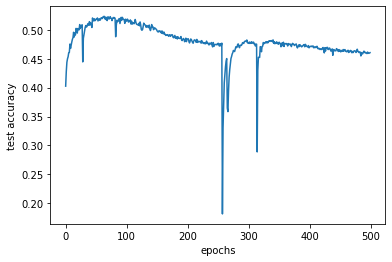

In [27]:
plt.xlabel('epochs')
plt.ylabel('test accuracy')    
plt.plot(epoch_vals, accuracy_vals)
plt.savefig('epoch_vs_accuracy')

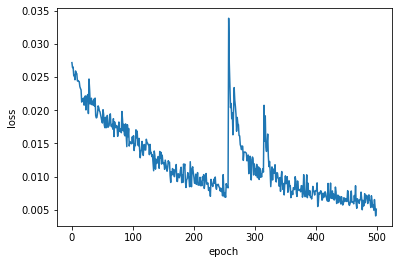

In [28]:
plt.xlabel('epoch')
plt.ylabel('loss')    
plt.plot(epoch_vals, loss_vals)
plt.savefig('epoch_vs_loss_vals')

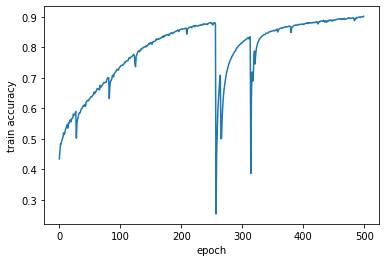

In [29]:
plt.xlabel('epoch')
plt.ylabel('train accuracy')
plt.plot(epoch_vals, train_accuracy_vals)
plt.savefig('epoch_vs_train_accuracy')

In [30]:
save_path = '/content/drive/MyDrive/ml_a4/non_comp_rnn1.pt'
torch.save(model.state_dict(), save_path)